In [9]:
# Typical imports here
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

```

```
# Load the data from an iNorm save file using `readsav`

In [10]:
from scipy.io import readsav

input_filename = 'CIV1548.2i_o.save'
# input_filename = 'rbs2005_SiII1260_o.save'
spec = readsav(input_filename)

In [11]:
integration_limits=[spec['v1'],spec['v2']]

```

```
# Load the data from an iNorm save file using `pyNorm`

In [1]:
from pyNorm.io import read_inorm

input_filename = 'CIV1548.2i_o.save'
spec=read_inorm(input_filename)

```

```
# Calculating absorber properties with `pyn_batch`

This is a convenience function that does all of the calculations from `pyn_column`, `pyn_eqwidth`, and `pyn_istat`. The details of using the individual procedures are given below.

In [2]:
from pyNorm.aod import pyn_batch

#### Calculate the column density using the velocity limits in the save file

In [14]:
spec_out = pyn_batch(spec)

********** CIV 1548.2 **********
pyn_batch: Wavelength = 1548.204
pyn_batch: f-value = 0.190

Velocity range of integration: -295.0 <= v <= -215.0

--------------------------------------------
log N = 12.715 (-0.267, +0.267)
--------------------------------------------

--------------------------------------------
<v>       = -270.95  +/- 16.88
<b>       =  24.66  +/- 13.27
dv90      =  56.87  +/- 23.87
Skew      =   0.64  +/- 3.32
--------------------------------------------

--------------------------------------------
EW           = 17.42
Stat Error   = 12.09
Cont Error   = 1.76
Tot Error    = 12.22
3sigma EW    < 36.67
***** WARNING: LINE NOT DETECTED AT 3 SIGMA! *****


Linear COG N = 12.64
2sigma N     < 12.78
3sigma N     < 12.96
--------------------------------------------


### Do the same calculations, but without printing the results

In [15]:
spec_out = pyn_batch(spec,integration_limits, verbose = False)

In [16]:
spec_out['ncol'],spec_out['EW']

(12.71548152402164, 17.42052467650511)

### Set the integration limits

In [17]:
integration_limits = [-200,100]
spec_out = pyn_batch(spec, integration_limits)

********** CIV 1548.2 **********
pyn_batch: Wavelength = 1548.204
pyn_batch: f-value = 0.190

Velocity range of integration: -200.0 <= v <= 100.0

--------------------------------------------
log N = 13.921 (-0.037, +0.037)
--------------------------------------------

--------------------------------------------
<v>       = -43.15  +/- 6.68
<b>       =  48.98  +/- 6.62
dv90      = 165.91  +/- 9.45
Skew      =  -0.53  +/- 0.87
--------------------------------------------

--------------------------------------------
EW           = 265.77
Stat Error   = 21.91
Cont Error   = 5.85
Tot Error    = 22.84
3sigma EW    < 68.51


Linear COG N = 13.82
2sigma N     < 13.05
3sigma N     < 13.23
--------------------------------------------


```




```
# Calculating column densities with `pyn_column`

In [18]:
from pyNorm.aod import pyn_column

### 1. Calculate the column with velocity limits in the save file

In [19]:
spec_out = pyn_column(spec)
spec_out['ncol'], spec_out['ncol_err_lo'], spec_out['ncol_err_hi']

(12.71548152402164, -0.26729178703803785, 0.26729178703803785)

### 2. Calculate the column with velocity limits from a variable

In [20]:
integration_limits=[-300,-150]

spec_out = pyn_column(spec,integration_limits)
spec_out['ncol'], spec_out['ncol_err_lo'], spec_out['ncol_err_hi']

(13.093897958798385, -0.15486311615601664, 0.15486311615601664)

### 3. Calculate the column with limits passed directly

In [21]:
spec_out = pyn_column(spec,integration_limits = [-100,-50])
spec_out['ncol'], spec_out['ncol_err_lo'], spec_out['ncol_err_hi']

(13.229653986262422, -0.07196024006842763, 0.07196024006842763)

```

```
# Calculating column densities with `pyn_eqwidth`

In [22]:
from pyNorm.aod import pyn_eqwidth

### 1. Calculate the EW with velocity limits in the save file

In [23]:
spec_out = pyn_eqwidth(spec)
spec_out['EW'], spec_out['EW_err']

(17.42052467650511, 12.223810162578102)

### 2. Calculate the EW with velocity limits from a variable

In [24]:
integration_limits=[-300,-150]

spec_out = pyn_eqwidth(spec,integration_limits)
spec_out['EW'], spec_out['EW_err']

(42.86748888757113, 16.687014472510658)

### 3. Calculate the EW with limits passed directly

In [25]:
spec_out = pyn_eqwidth(spec,integration_limits = [-100,-50])
spec_out['EW'], spec_out['EW_err']

(57.76565536440982, 8.66487823510779)

### 4. Is the line detected at the 2$\sigma$ level?

In [26]:
spec_out['detection_2sig']

True

#### the 3$\sigma$ level?

In [27]:
spec_out['detection_3sig']

True

```

```
# Calculating absorber statistics with `pyn_istat`

In [28]:
from scipy.io import readsav

input_filename = 'CIV1548.2i_o.save'
# input_filename = 'rbs2005_SiII1260_o.save'
spec = readsav(input_filename)

In [29]:
integration_limits=[spec['v1'],spec['v2']]
integration_limits=[-200,100]

In [30]:
from pyNorm.aod import pyn_eqwidth
from pyNorm.aod import pyn_column
from pyNorm.aod import pyn_istat

#### Calculate the column density using the velocity limits in the save file

In [31]:
spec_out = pyn_column(spec,integration_limits)
spec_out = pyn_eqwidth(spec_out,integration_limits)
spec_out = pyn_istat(spec_out,integration_limits)
print(spec_out['va'], spec_out['va_err'])
print(spec_out['ba'], spec_out['ba_err'])
print(spec_out['dv90'], spec_out['v90a'],spec_out['v90b'])

-43.152041764977206 6.679239569289574
48.980482611304296 6.616774376670674
165.91064653710245 -140.99571442029907 24.91493211680338


```


```
# Plotting normalized flux, $N_a(v)$ profiles.

(-400.0, 300.0)

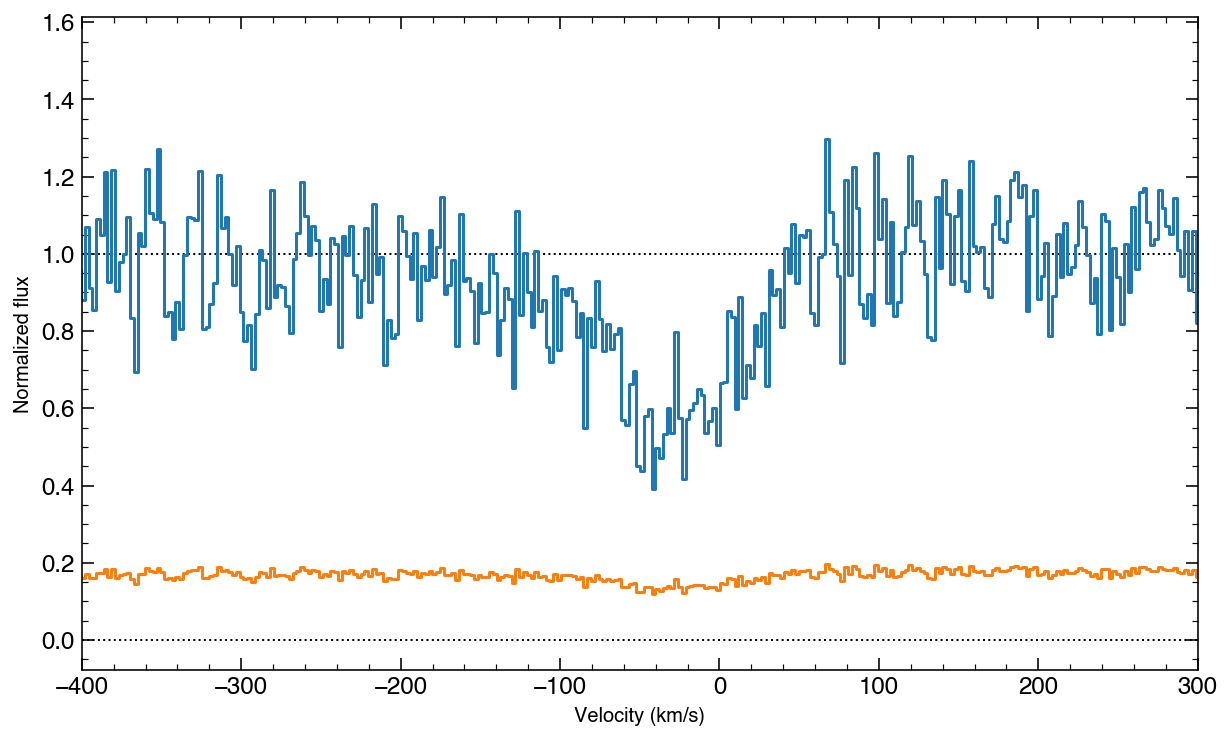

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(spec_out['vnorm'],spec_out['fnorm'],drawstyle='steps-mid')
plt.plot(spec_out['vnorm'],spec_out['fnorm_err'],drawstyle='steps-mid')

plt.axhline(0,linestyle=':',color='k',linewidth=1,zorder=0)
plt.axhline(1,linestyle=':',color='k',linewidth=1,zorder=0)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized flux')
plt.xlim(-400,300)

(-400.0, 300.0)

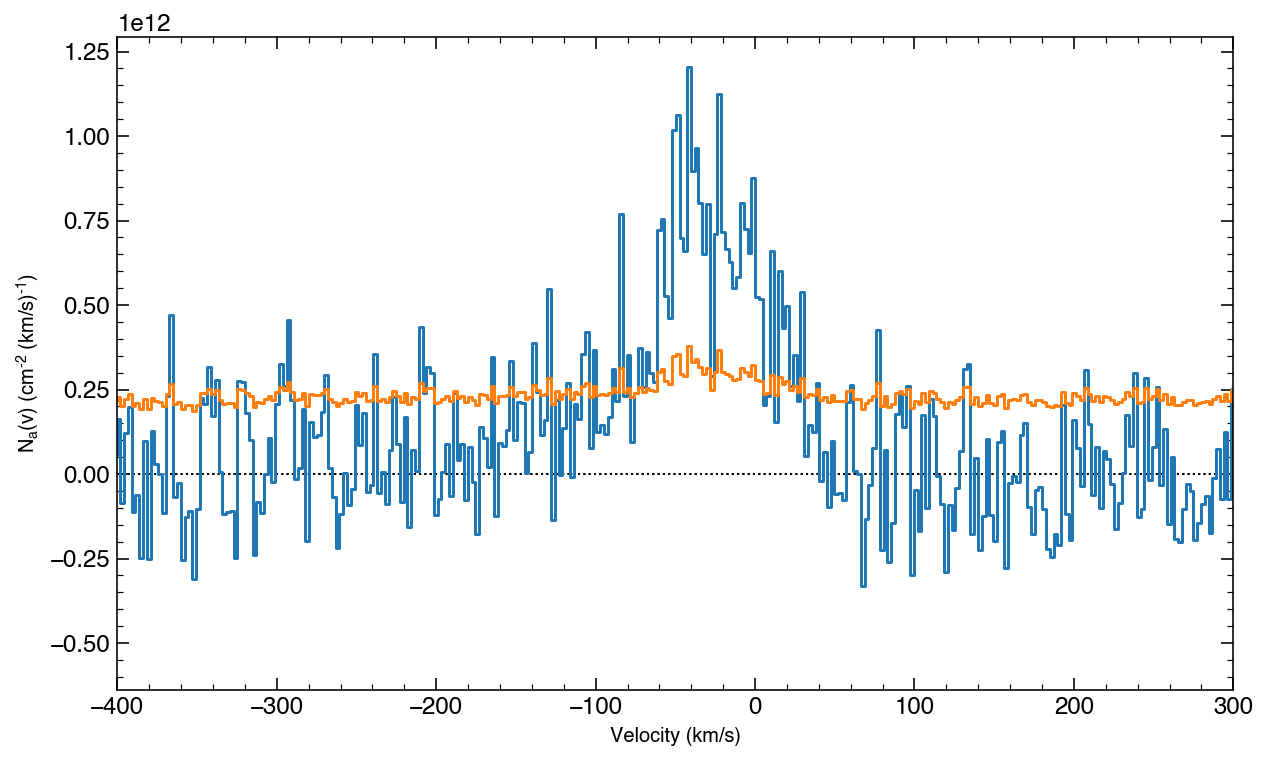

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(spec_out['vnorm'],spec_out['Nav'],drawstyle='steps-mid')
plt.plot(spec_out['vnorm'],spec_out['Nav_err'],drawstyle='steps-mid')

plt.axhline(0,linestyle=':',color='k',linewidth=1,zorder=0)
plt.axhline(1,linestyle=':',color='k',linewidth=1,zorder=0)
plt.xlabel('Velocity (km/s)')
plt.ylabel('$N_a(v)$ (cm$^{-2}$ (km/s)$^{-1}$)')
plt.xlim(-400,300)